In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import fitsio as ft
import sys
sys.path.append('/home/mehdi/github/LSSutils')
import lssutils.utils as lu
import numpy as np
import healpy as hp

In [2]:
old = ft.read('/home/mehdi/data/dr9v0.57.0/sv3nn_v1/tables/sv3tab_LRG_NBMZLS_256.fits')
new = ft.read('/home/mehdi/data/rongpu/imaging_sys/tables/nlrg_features_bmzls_256.fits')

In [3]:
old.size, new.size

(97323, 97775)

In [4]:
lnew = lu.make_hp(256, new['hpix'], new['label'])
lold = lu.make_hp(256, old['hpix'], old['label'])

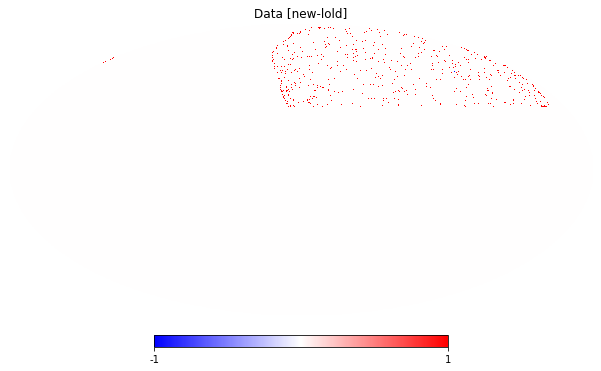

In [14]:
hp.mollview(lnew-lold, rot=-90, max=1, cmap=plt.cm.bwr, title='Data [new-lold]')

In [12]:
common = np.intersect1d(new['hpix'], old['hpix'])

(array([9.4608e+04, 2.5150e+03, 1.4700e+02, 3.0000e+01, 0.0000e+00,
        6.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

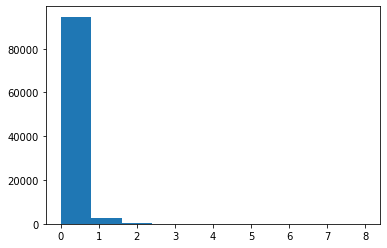

In [13]:
plt.hist((lnew-lold)[common])

In [6]:
common.size

97311

Text(0, 0.5, 'N LRG [old]')

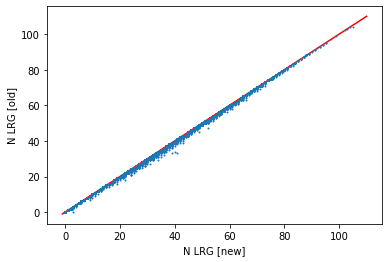

In [15]:
plt.scatter(lnew[common], lold[common], 1.)
plt.plot([-1, 110], [-1, 110.], 'r', zorder=-1)
plt.xlabel('N LRG [new]')
plt.ylabel('N LRG [old]')

In [15]:
fnew = lu.make_hp(256, new['hpix'], new['fracgood'], False)
fold = lu.make_hp(256, old['hpix'], old['fracgood'], False)

(array([3.3000e+01, 5.1300e+02, 3.8080e+03, 1.4892e+04, 2.9531e+04,
        2.9301e+04, 1.4713e+04, 4.1450e+03, 3.6000e+02, 1.5000e+01]),
 array([-0.25266495, -0.21931914, -0.18597333, -0.15262751, -0.1192817 ,
        -0.08593589, -0.05259008, -0.01924426,  0.01410155,  0.04744736,
         0.08079317]),
 <a list of 10 Patch objects>)

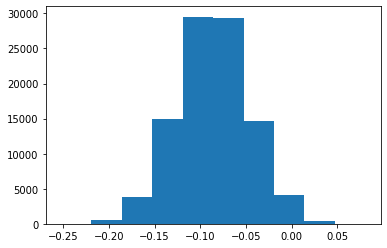

In [16]:
plt.hist(fnew[common]-fold[common])

In [17]:
dfrac = fnew-fold

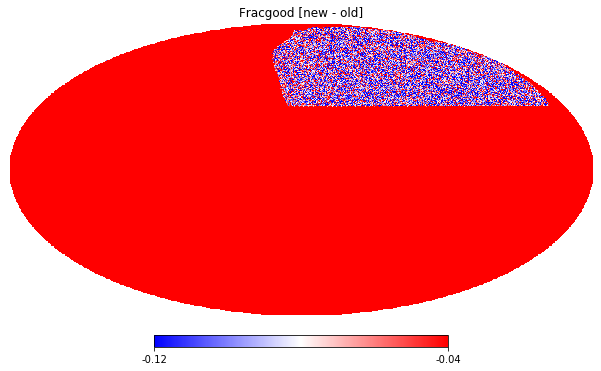

In [20]:
hp.mollview(dfrac, rot=-90, min=-0.12, max=-0.04, cmap=plt.cm.bwr, title='Fracgood [new - old]')

Text(0, 0.5, 'N Ran [old]')

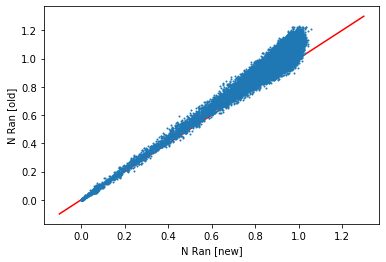

In [16]:
plt.scatter(fnew[common], fold[common], 1.)
plt.plot([-.1, 1.3], [-.1, 1.3], 'r', zorder=-1)

plt.xlabel('N Ran [new]')
plt.ylabel('N Ran [old]')

In [17]:
new['features'][0]

array([1.29754961e-01, 9.15055176e+02, 2.26882458e+01, 2.34850712e+01,
       2.21640606e+01, 2.28218365e+01, 2.36588726e+01, 2.24718323e+01,
       2.17087517e+01, 2.12215195e+01, 2.17911959e+00, 1.79487324e+00,
       1.22615516e+00])

In [18]:
old['features'][0]

array([1.01037341e+03, 1.38125464e-01, 2.07790834e+01, 2.36405716e+01,
       2.28038311e+01, 2.24616947e+01, 2.34639244e+01, 2.26701241e+01,
       2.21539230e+01, 1.79487300e+00, 2.14935255e+00, 1.22891545e+00,
       2.17247581e+01, 2.12261162e+01])

In [19]:
enew = lu.make_hp(256, new['hpix'], new['features'][:, 0])
eold = lu.make_hp(256, old['hpix'], old['features'][:, 1])

Text(0, 0.5, 'EBV [old]')

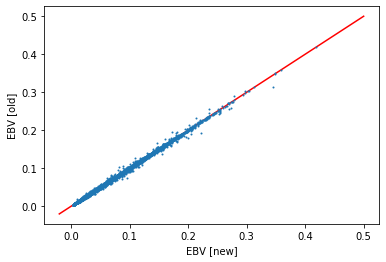

In [21]:
plt.scatter(enew[common], eold[common], 1.)
plt.plot([-.02, 0.5], [-.02, 0.5], 'r', zorder=-1)

plt.xlabel('EBV [new]')
plt.ylabel('EBV [old]')

In [2]:
d = ft.read('/home/mehdi/data/rongpu/imaging_sys/density_maps/0.57.0/'
            'resolve/density_map_sv3_elg_south_nside_256_minobs_1_maskbits_1111213.fits')

In [11]:
d = ft.read('/home/mehdi/data/rongpu/imaging_sys/tables/nlrg_features_sdecals_256.fits')

In [12]:
radec = lu.hpix2radec(256, d['hpix'])

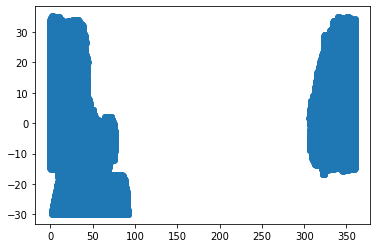

In [13]:
plt.scatter(*radec)

In [10]:
radec[1].max()

32.26623714406663

In [3]:
def sel_reg(ra,dec,reg):
    
    wra = (ra > 100.-dec)
    wra &= (ra < 280. +dec)
    
    if reg == 'DN':
        w = dec < 32.375
        w &= wra
    if reg == 'DS':
        w = ~wra
        w &= dec > -30.0
    return w

In [4]:
mn = sel_reg(d['RA'], d['DEC'], 'DN')
ms = sel_reg(d['RA'], d['DEC'], 'DS')

ndecals = d[mn]
sdecals = d[ms]

In [5]:
d.size, ndecals.size+sdecals.size

(284648, 222689)

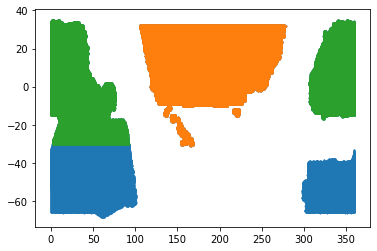

In [6]:
plt.scatter(d['RA'], d['DEC'], 1)
plt.scatter(ndecals['RA'], ndecals['DEC'], 1)
plt.scatter(sdecals['RA'], sdecals['DEC'], 1)

In [1]:
import numpy as np
import fitsio as ft
from glob import glob
from scipy.stats import pearsonr
import sys
sys.path.append('/home/mehdi/github/LSSutils')
import lssutils.utils as ut

In [21]:
help(ft.write)

Help on function write in module fitsio.fitslib:

write(filename, data, extname=None, extver=None, units=None, compress=None, table_type='binary', header=None, clobber=False, **keys)
    Convenience function to create a new HDU and write the data.
    
    Under the hood, a FITS object is constructed.  If you want to append rows
    to an existing HDU, or modify data in an HDU, please construct a FITS
    object.
    
    parameters
    ----------
    filename: string
        A filename.
    data:
        Either a normal n-dimensional array or a recarray.  Images are written
        to a new IMAGE_HDU and recarrays are written to BINARY_TBl or
        ASCII_TBL hdus.
    extname: string, optional
        An optional name for the new header unit.
    extver: integer, optional
        FITS allows multiple extensions to have the same name (extname).
        These extensions can optionally specify an EXTVER version number in
        the header.  Send extver= to set a particular version, wh

In [16]:
cap = 'north'
kind = 'lrg'
nside = 256
maskbits = {'lrg':189111213}
tag_d = '0.57.0'
tag_r = '0.49.0'
path = '/home/mehdi/data/rongpu/imaging_sys'

mb = maskbits[kind]
data_ng = ft.read(f'{path}/density_maps/{tag_d}/resolve/density_map_sv3_{kind}_{cap}_nside_{nside}_minobs_1_maskbits_{mb}.fits')
data_tmp = ft.read(f'{path}/randoms_stats/{tag_r}/resolve/combined/pixmap_{cap}_nside_{nside}_minobs_1_maskbits_{mb}.fits')

ngal = ut.make_hp(nside, data_ng['HPXPIXEL'], data_ng['n_targets'])


hpix = data_tmp['HPXPIXEL']
fracgood = data_tmp['FRACAREA']

label = ngal[hpix]

features = []
for col in ut.maps_dr9:
    feat_ = data_tmp[col]
    features.append(feat_)
features = np.array(features).T

data_nn = ut.to_numpy(label, features, fracgood, hpix)
for name in data_nn.dtype.names:
    assert (~np.isfinite(data_nn[name])).sum() == 0, f'{name} is bad'

In [20]:
for i in range(13):
    print(i, pearsonr(data_nn['label'], data_nn['features'][:, i]))

0 (-0.06099791123952368, 3.0016153329383107e-81)
1 (-0.10414968283551893, 6.810174894796439e-234)
2 (0.0677067861042488, 1.0556023672298127e-99)
3 (0.07444407226312436, 3.513177615090887e-120)
4 (0.0641257339613887, 1.3000636337621176e-89)
5 (0.07092870939066391, 2.9799514505103216e-109)
6 (0.06673347297328021, 6.61482311540203e-97)
7 (0.05802038053189478, 1.1210508557940346e-73)
8 (-0.013369492994524217, 2.9069057429357835e-05)
9 (-0.022598643541437, 1.5811307802271132e-12)
10 (-0.034287835753997555, 7.812739627012168e-27)
11 (0.01354277865440862, 2.2872393702535546e-05)
12 (-0.011774339181632468, 0.00023159489548003074)
